**About Dataset : [Kunjungi Laman Berikut](https://www.kaggle.com/datasets/uciml/iris)**

The Iris dataset merupakan data set yang digunakan oleh R.A. Fisher pada paper classic tahun 1936, Bertujuan untuk mengukur beberapa permasalahan taksonomi, dan dapat digunakan pula sebagai Machine Learning Repository.

Dataset ini berisi tiga iris species dengan masing-masing 50 sample dan setiap sample berisi properti dari bunga iris.

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other. You can follow

# **Import Semua Library dan File yang Diperlukan**

**Import Menggunakan Drive**

In [ ]:
"""
from google.colab import drive
drive.mount('/content/gdrive')
"""

**Import Menggunakan Repository Github yang Telah Dipesiapkan**

In [1]:
#Import dataset iris.zip
!wget --no-check-certificate \
https://github.com/AhmadZakkiZainalAbidin/Model-For-Classification-3-or-more-Classes-/raw/main/iris.zip \
-O /content//iris.zip

--2024-03-23 01:46:16--  https://github.com/AhmadZakkiZainalAbidin/Model-For-Classification-3-or-more-Classes-/raw/main/iris.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AhmadZakkiZainalAbidin/Model-For-Classification-3-or-more-Classes-/main/iris.zip [following]
--2024-03-23 01:46:17--  https://raw.githubusercontent.com/AhmadZakkiZainalAbidin/Model-For-Classification-3-or-more-Classes-/main/iris.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3687 (3.6K) [application/zip]
Saving to: ‘/content//iris.zip’

/content//iris.zip  100%[===================>]   3.60K  --.-KB/s    in 0s      



In [4]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

# **Inisialisasi dan Persiapan Dataset**

**Import Cara Google Drive**

In [ ]:
"""
df=pd.read_csv('gdrive/My Drive/Colab Notebooks/Dicoding Belajar Mengembangkan Machine Learning (Tingkat Menengah)/Dicoding_Dataset_MachineLearning(Intermediet)_Folders/Iris.csv')
df
"""

**Import Menggunakan Github : Ekstrak File pada Content**

In [2]:
import zipfile
file_zip = '/content/iris.zip'
zip_ref = zipfile.ZipFile(file_zip,'r')
zip_ref.extractall('/content')
zip_ref.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/content/iris.zip' mode='r'>>

In [5]:
df = pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Lakukan drop pada colom yang tidak diperlukan (Id)

In [6]:
df= df.drop(columns='Id') #Melakukan Drop pada kolom Id

Karena label kita merupakan data kategorikal gunakan fungsi one hot encoding (fungsi 'get_dummies()'). Untuk memahami one hot encoding dapat dilihat pada link berikut

https://www.statology.org/one-hot-encoding-in-python/

In [7]:
df.Species.nunique()

3

Terdapat nilai 3 nunique() menunjukkan tiga jenis kelas. Untuk mengubah kelas ini menjadi nilai angka tiap barisnya dilakukan one-hot-encoding

In [9]:
category = pd.get_dummies(df.Species)
category.head()

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


Kolom diatas mengartikan bernial 1 apabila true dan 0 apabila false

Membuat dataframe baru dengan tambahan one hot encoding dan membuang kolom yang tidak dipakai (species)

In [10]:
#Menggabugkan df dengan category
new_df = pd.concat([df, category], axis=1)
new_df = new_df.drop(columns='Species')
new_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


Jangan lupa dicek apabila data frame diatas apakah sudah sesuai(sudah berbentuk angka semua)

In [11]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SepalLengthCm    150 non-null    float64
 1   SepalWidthCm     150 non-null    float64
 2   PetalLengthCm    150 non-null    float64
 3   PetalWidthCm     150 non-null    float64
 4   Iris-setosa      150 non-null    uint8  
 5   Iris-versicolor  150 non-null    uint8  
 6   Iris-virginica   150 non-null    uint8  
dtypes: float64(4), uint8(3)
memory usage: 5.3 KB


**Dataframe kemudian diubah menjadi array**


In [12]:
dataset= new_df.values
dataset

array([[5.1, 3.5, 1.4, ..., 1. , 0. , 0. ],
       [4.9, 3. , 1.4, ..., 1. , 0. , 0. ],
       [4.7, 3.2, 1.3, ..., 1. , 0. , 0. ],
       ...,
       [6.5, 3. , 5.2, ..., 0. , 0. , 1. ],
       [6.2, 3.4, 5.4, ..., 0. , 0. , 1. ],
       [5.9, 3. , 5.1, ..., 0. , 0. , 1. ]])

**Pisah antara label dengan attribut**

Pilih 4 kolom pertama untuk dijadikan sebagai atribut dan 3 kolom trakhir sebagai label

In [13]:
X= dataset[:,0:4] # 4 Kolom pertama sebagai atribut
y= dataset[:, 4:] # 3 Kolom terakhir sebagai label

# **Preprocessing Dataset & Persiapan Data Training dan Testing**

Lakukan normalisasi agar jst (**jaringan syaraf tiruan**) bisa mempelajari dataset dengan baik (dilakukan untuk 4 kolom atribut)

In [16]:
#Normalisasi
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
#X_scale

Pisahkan data menjadi data latih dan data uji untuk mengevaluasi kinerja model yang dibuat menggunakan Fungsi train_test_split dengan rasio 30% (0.3) sebagai data uji

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size=0.3)

# **Pembuatan Model & Latihan Model Sequential**

In [18]:
from keras.models import Sequential
from keras.layers import Dense

Kita akan membuat model dengan 3 layer dengan 2 layer pertama menggunakan relu dan layer terakhir dengan softmax karena cocok untuk klasifikasi multiclass

NB : Anda bisa menggunakan fungsi aktivasi lainnya (menggantikan relu)

In [19]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(4,)),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax'),
])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 4675 (18.26 KB)
Trainable params: 4675 (18.26 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Setelah model terbentuk tentukan optimizer dan loss function.


*   Untuk optimizer digunakan Adam
*   Gunakan loss fucntion yaitu categorical_crossentropy untuk klasifikasi 3 kelas atau lebih
*   Tampilkan metrics accuracy untuk memantau akurasi pelatihan model

In [21]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Lakukan pelatihan model

In [22]:
moreclass_model = model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 6ms/step - loss: 1.0829 - accuracy: 0.5714
Epoch 2/100
4/4 [==============================] - 0s 6ms/step - loss: 1.0534 - accuracy: 0.6286
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 1.0267 - accuracy: 0.6476
Epoch 4/100
4/4 [==============================] - 0s 6ms/step - loss: 1.0004 - accuracy: 0.6476
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 0.9747 - accuracy: 0.6476
Epoch 6/100
4/4 [==============================] - 0s 6ms/step - loss: 0.9480 - accuracy: 0.6476
Epoch 7/100
4/4 [==============================] - 0s 5ms/step - loss: 0.9179 - accuracy: 0.6476
Epoch 8/100
4/4 [==============================] - 0s 6ms/step - loss: 0.8848 - accuracy: 0.6476
Epoch 9/100
4/4 [==============================] - 0s 6ms/step - loss: 0.8503 - accuracy: 0.6476
Epoch 10/100
4/4 [==============================] - 0s 6ms/step - loss: 0.8162 - accuracy: 0.6476
Epoch 11/100
4/4 [===========

# **Lakukan Evaluasi Model dengan Plot dan Train**

Tambahan Plot Akurasi dan Loss Train

2/2 [==============================] - 0s 11ms/step - loss: 0.1081 - accuracy: 0.9333


[0.10811346769332886, 0.9333333373069763]

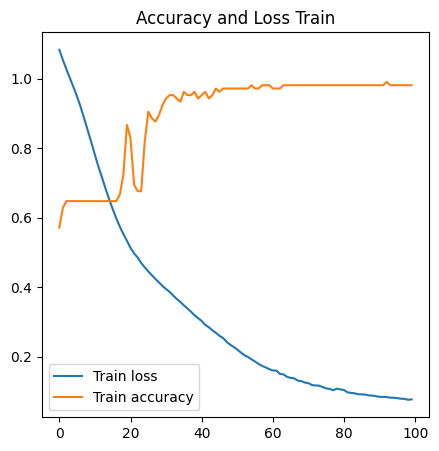

In [23]:
#Tambahan untuk melihat plot hasil pelatihan (train loss) tiap epochnya
import matplotlib.pyplot as plt

def show_graph(history):
    fig, ax = plt.subplots(1, figsize=(5,5))
    ax.set_title('Accuracy and Loss Train')
    ax.plot(history.epoch, history.history["loss"], label="Train loss")
    ax.plot(history.epoch, history.history['accuracy'], label='Train accuracy')
    ax.legend()

show_graph(moreclass_model)
model.evaluate(X_test, Y_test)

In [ ]:
"""
!pip install -q opendatasets

import opendatasets as od
od.download('https://www.kaggle.com/datasets/joshmcadams/oranges-vs-grapefruit/download?datasetVersionNumber=2')
"""

# **Apabila ditambahkan dengan Tambahan CallBackss**

**Tujuan CallBacks yaitu untuk memberitahukan model apabila telah mencapai akurasi yang diinginkan sehingga train dapat dihentikan (Keuntungannya tentunya hemat waktu train yang dilakukan)**

In [24]:
#Import Library
import tensorflow as tf
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

#Import Dataset
"""
from google.colab import drive
drive.mount('/content/gdrive')
df=pd.read_csv('gdrive/My Drive/Colab Notebooks/Dicoding Belajar Mengembangkan Machine Learning (Tingkat Menengah)/Dicoding_Dataset_MachineLearning(Intermediet)_Folders/Iris.csv')
"""
df= pd.read_csv('/content/Iris.csv')

#Persiapan Dataset
df = df.drop(columns='Id')
category = pd.get_dummies(df.Species)
new_df = pd.concat([df, category], axis=1)
new_df = new_df.drop(columns='Species')
dataset = new_df.values #normalisasi atribut
X = dataset[:,0:4]
y = dataset[:,4:7]

#Persiapan Model
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size=0.3)
model = Sequential([
                    Dense(64, activation='relu', input_shape=(4,)),
                    Dense(64, activation='relu'),
                    Dense(3, activation='softmax'),])
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Pemberian callback selanjutnya dilakukan dengan memberikan inherit tf.keras.callbacks.Callback.
Kemudian tambahkan fungsi yang penting untuk memberitahukan model berhenti berlatih ketika telah mencapai akurasi yang diinginkan

Pada Callback terdapat perintah **if conditional yaitu if(logs.get('accuraccy')>0.9) bersifat sangat intuitif** menunjukkan apabila akurasi lebih besar dari 0.9 mengeksekusi perintah berikutnya yaitu


*   **print('\n Akurasi telah mencapai >90%!')**
*   **self.model.stop_training=True (untuk menghentikan model)**   



In [25]:
class myCallback(tf.keras.callbacks.Callback) :
  def on_epoch_end(self, epoch, logs={}) :
    if(logs.get('accuracy')>0.9) :
      print('\nAkurasi telah mencapai >90%!')
      self.model.stop_training = True
callbacks = myCallback()

Lakukan train model dengan model.fit dan tambahkan callbacks

In [26]:
with_callback = model.fit(X_train, Y_train, epochs=100, callbacks=[callbacks])

Epoch 1/100
4/4 [==============================] - 1s 7ms/step - loss: 1.0807 - accuracy: 0.3619
Epoch 2/100
4/4 [==============================] - 0s 5ms/step - loss: 1.0436 - accuracy: 0.3143
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 1.0092 - accuracy: 0.3810
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 0.9816 - accuracy: 0.4000
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 0.9563 - accuracy: 0.4476
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 0.9316 - accuracy: 0.5429
Epoch 7/100
4/4 [==============================] - 0s 5ms/step - loss: 0.9081 - accuracy: 0.6095
Epoch 8/100
4/4 [==============================] - 0s 5ms/step - loss: 0.8820 - accuracy: 0.6381
Epoch 9/100
4/4 [==============================] - 0s 6ms/step - loss: 0.8561 - accuracy: 0.6381
Epoch 10/100
4/4 [==============================] - 0s 5ms/step - loss: 0.8283 - accuracy: 0.6381
Epoch 11/100
4/4 [===========

**Plot Accuracy & Loss Serta Hasil Evaluasinya**

2/2 [==============================] - 0s 10ms/step - loss: 0.4411 - accuracy: 0.9556


[0.44113031029701233, 0.9555555582046509]

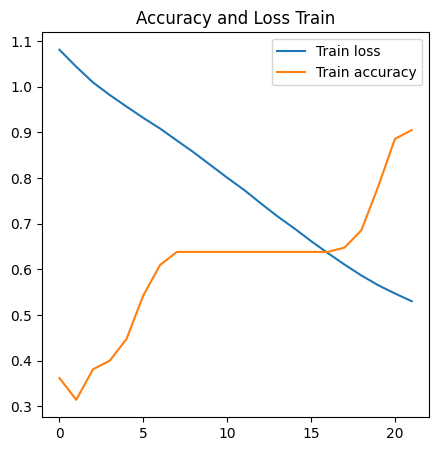

In [27]:
import matplotlib.pyplot as plt

def show_graph(history):
    fig, ax = plt.subplots(1, figsize=(5,5))
    ax.set_title('Accuracy and Loss Train')
    ax.plot(history.epoch, history.history["loss"], label="Train loss")
    ax.plot(history.epoch, history.history['accuracy'], label='Train accuracy')
    ax.legend()

show_graph(with_callback)
model.evaluate(X_test, Y_test)